In [1]:
pip install numpy tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

grid_size = 5
n_actions = 4

# Initialize Q-table with zeros
Q_table = np.zeros((grid_size * grid_size, n_actions))

In [3]:
Q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
rewards = np.full((grid_size * grid_size,), -1)
rewards[24] = 10  # Goal state
rewards[12] = -10  # Pitfall state

In [5]:
def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)  # Explore
    else:
        return np.argmax(Q_table[state])  # Exploit

In [33]:
alpha = 0.1  # Learning rate
gamma = 0.2  # Discount factor
epsilon = 0.7  # Exploration rate

for episode in range(100):
    state = np.random.randint(0, grid_size * grid_size)  # Random start
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, grid_size * grid_size)  # Random next state
        reward = rewards[next_state]

        # Update Q-value using Bellman equation
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:
            done = True  # End episode if goal or pitfall is reached

In [23]:
reward

-10

In [34]:
Q_table

array([[-9.84311611e-01, -2.45613664e-02, -1.02104784e+00,
        -1.17329209e+00],
       [-9.29372955e-01, -1.46118277e+00, -4.66379398e-01,
        -5.25668844e-01],
       [-4.22161736e-01, -1.67212765e+00, -1.22911026e+00,
        -2.04584780e+00],
       [-1.87646526e+00, -1.16700197e+00, -3.37882372e+00,
        -2.44289744e+00],
       [-5.51289019e-01, -1.13009265e+00, -2.35178291e+00,
        -2.77385932e+00],
       [-2.45115744e-01, -1.29562837e+00, -1.99228641e+00,
        -1.30228496e+00],
       [-1.14778451e+00, -1.13971947e+00, -1.22689094e+00,
        -1.41930838e+00],
       [-1.20256391e+00, -1.47189319e+00, -2.53107625e+00,
        -1.06466176e+00],
       [-1.79444225e+00, -9.91081686e-01, -9.42981774e-01,
        -1.38316032e+00],
       [ 6.67269755e-02, -1.15222673e+00, -1.71232707e+00,
        -1.98223478e+00],
       [-1.15346417e+00, -4.99073413e-03, -1.24482058e+00,
        -1.11053536e+00],
       [-2.10282668e+00, -1.28684434e+00, -1.57507559e+00,
      

In [35]:
import tensorflow as tf

n_states = grid_size * grid_size  # 25 states in the grid
n_actions = 4  # Four possible actions

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(n_states,)),
    tf.keras.layers.Dense(n_actions, activation='softmax')  # Output action probabilities
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [8]:
def get_action(state):
    state_input = tf.one_hot(state, n_states)  # One-hot encode the state
    action_probs = model(state_input[np.newaxis, :])
    return np.random.choice(n_actions, p=action_probs.numpy()[0])

In [9]:
def compute_cumulative_rewards(rewards, gamma=0.99):
    cumulative_rewards = np.zeros_like(rewards)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = running_add * gamma + rewards[t]
        cumulative_rewards[t] = running_add
    return cumulative_rewards

In [13]:
def update_policy(states, actions, rewards):
    cumulative_rewards = compute_cumulative_rewards(rewards)

    with tf.GradientTape() as tape:
        state_inputs = tf.one_hot(states, n_states)
        action_probs = model(state_inputs)
        action_masks = tf.one_hot(actions, n_actions)

        # Log-probabilities of the actions taken
        log_probs = tf.reduce_sum(action_masks * tf.math.log(action_probs), axis=1)

        # Policy loss function
        loss = -tf.reduce_mean(log_probs * cumulative_rewards)

    # Apply gradients to update the policy network
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [17]:
rewards = np.full((grid_size * grid_size,), -1)
rewards[24] = 10  # Goal state
rewards[12] = -10  # Pitfall state

In [21]:
rewards_policy_gradients = compute_cumulative_rewards(rewards)

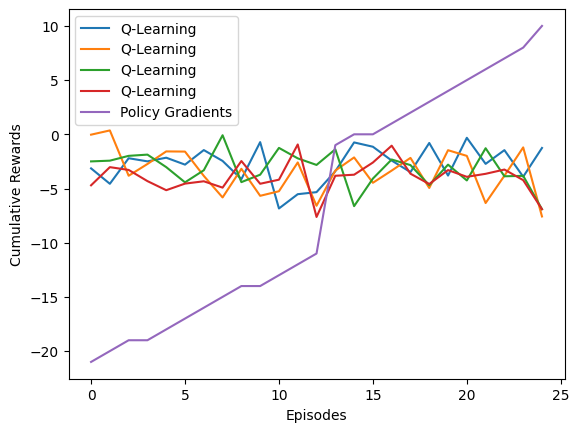

In [32]:
import matplotlib.pyplot as plt

# Example code to visualize rewards over episodes
plt.plot(Q_table, label='Q-Learning')
plt.plot(rewards_policy_gradients, label='Policy Gradients')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.show()